<a href="https://colab.research.google.com/github/asfundyarkhan/Cloud-computing/blob/main/Data_Handling_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1: Creating and Visualizing Random Data**

First, let's import the necessary libraries for both problems.

In [12]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.ticker as ticker
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from scipy import stats
from matplotlib.lines import Line2D

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

Now, let's generate random data for Problem 1 and calculate key statistics.

In [13]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random data from a non-standard distribution (skewed)
# Using a mixture of two distributions to create an interesting pattern
# Normal distribution centered at 2
data1 = np.random.normal(loc=2, scale=1.5, size=200)
# Exponential distribution
data2 = np.random.exponential(scale=2.0, size=150)
# Combine them
data = np.concatenate([data1, data2])

# Calculate statistics
mean_val = np.mean(data)
median_val = np.median(data)
std_val = np.std(data)
min_val = np.min(data)
max_val = np.max(data)
skew_val = stats.skew(data)

Create a high-quality visualization for Problem 1.

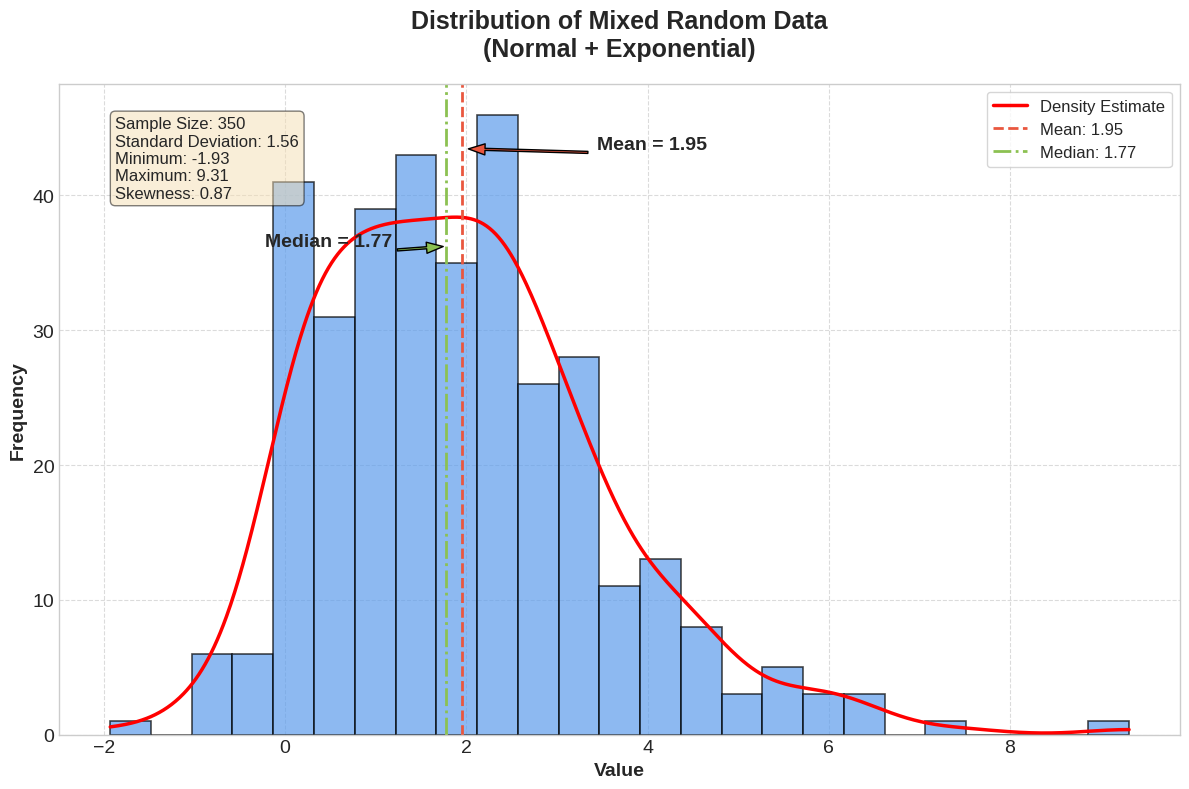

In [14]:
# Create a figure with increased size and DPI for better quality
plt.figure(figsize=(12, 8), dpi=100)

# Create a histogram with customized style
n, bins, patches = plt.hist(data, bins=25, alpha=0.7, color='#5D9CEC',
                           edgecolor='black', linewidth=1.2)

# Add a kernel density estimate curve
x = np.linspace(min(data), max(data), 1000)
density = stats.gaussian_kde(data)
plt.plot(x, density(x) * len(data) * (bins[1] - bins[0]),
         'r-', linewidth=2.5, label='Density Estimate')

# Add vertical lines for mean and median
plt.axvline(mean_val, color='#E9573F', linestyle='--', linewidth=2,
            label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='#8CC152', linestyle='-.', linewidth=2,
            label=f'Median: {median_val:.2f}')

# Add annotations with arrows pointing to the lines
plt.annotate(f'Mean = {mean_val:.2f}', xy=(mean_val, plt.ylim()[1]*0.9),
            xytext=(mean_val + 1.5, plt.ylim()[1]*0.9),
            arrowprops=dict(facecolor='#E9573F', shrink=0.05, width=1.5,
                            headwidth=8),
            fontsize=14, fontweight='bold')

plt.annotate(f'Median = {median_val:.2f}', xy=(median_val, plt.ylim()[1]*0.75),
            xytext=(median_val - 2, plt.ylim()[1]*0.75),
            arrowprops=dict(facecolor='#8CC152', shrink=0.05, width=1.5,
                            headwidth=8),
            fontsize=14, fontweight='bold')

# Customize the plot
plt.title('Distribution of Mixed Random Data\n(Normal + Exponential)',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Value', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, framealpha=0.8)

# Add a text box with additional statistics
stats_text = (f"Sample Size: {len(data)}\n"
              f"Standard Deviation: {std_val:.2f}\n"
              f"Minimum: {min_val:.2f}\n"
              f"Maximum: {max_val:.2f}\n"
              f"Skewness: {skew_val:.2f}")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

**Problem 2: Loading and Visualizing Data from a Parquet File**

First, let's load and inspect the parquet file:

In [15]:
# Load the parquet file
df = pq.read_table('exercises_problem2.parquet').to_pandas()

# Examine the data structure
print("First few rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nDataset information:")
print(df.info())

First few rows of the dataset:
       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0

Summary statistics:
             var1        var2        var3       class
count  400.000000  400.000000  400.000000  400.000000
mean     3.469246    2.576392    6.045638    0.627500
std      3.811159    0.533500    4.219296    0.484076
min     -5.577154    0.444386   -5.132768    0.000000
25%      0.068847    2.346191    2.419225    0.000000
50%      4.968903    2.708548    7.961119    1.000000
75%      7.025826    2.951366    9.840901    1.000000
max      9.425215    3.471373   12.048517    1.000000

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null   

Now, let's create comprehensive visualizations for Problem 2:

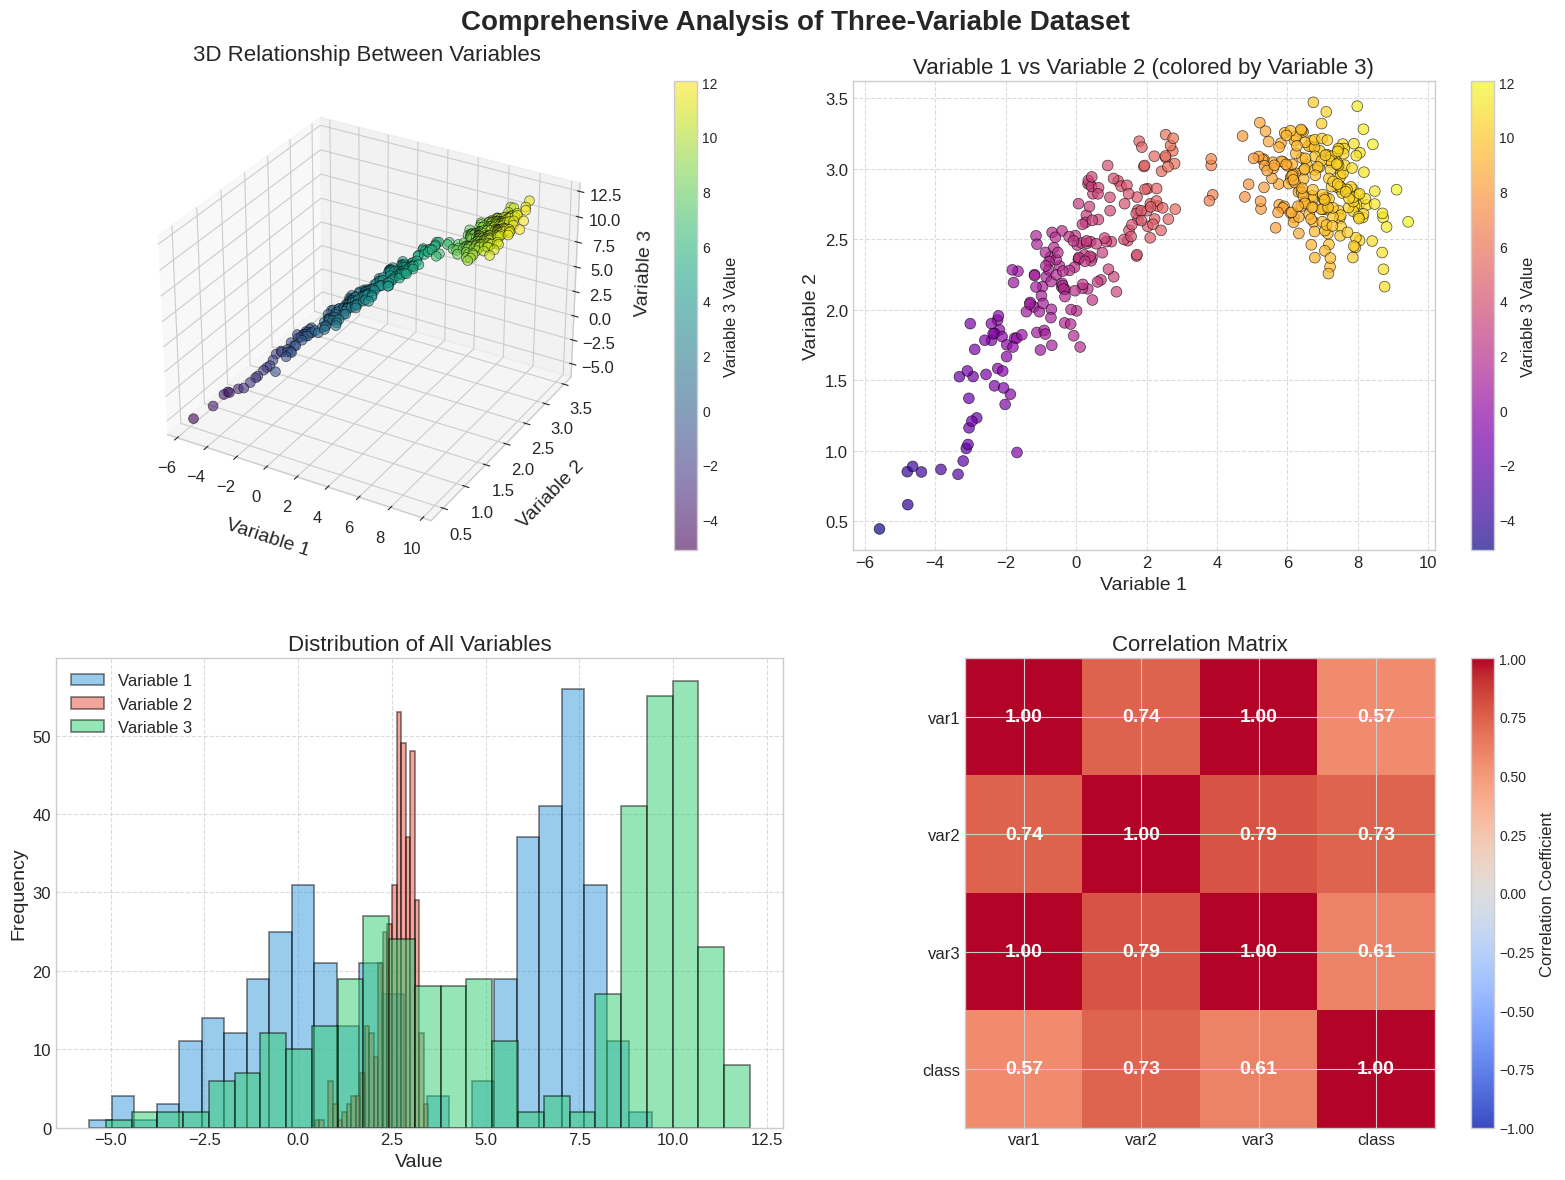

In [16]:
# Create a figure with multiple subplots to thoroughly present the data
fig = plt.figure(figsize=(16, 12), dpi=100)
gs = fig.add_gridspec(2, 2)

# Subplot 1: 3D scatter plot showing all three variables
ax1 = fig.add_subplot(gs[0, 0], projection='3d')
scatter = ax1.scatter(df['var1'], df['var2'], df['var3'],
                      c=df['var3'], cmap='viridis',
                      s=50, alpha=0.6, edgecolor='k', linewidth=0.5)

ax1.set_xlabel('Variable 1', fontsize=14, labelpad=10)
ax1.set_ylabel('Variable 2', fontsize=14, labelpad=10)
ax1.set_zlabel('Variable 3', fontsize=14, labelpad=10)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_title('3D Relationship Between Variables', fontsize=16, pad=15)

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax1, pad=0.1)
cbar.set_label('Variable 3 Value', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Subplot 2: Pair plot (var1 vs var2) colored by var3
ax2 = fig.add_subplot(gs[0, 1])
im = ax2.scatter(df['var1'], df['var2'], c=df['var3'],
                 cmap='plasma', s=60, alpha=0.7, edgecolor='k', linewidth=0.5)

ax2.set_xlabel('Variable 1', fontsize=14)
ax2.set_ylabel('Variable 2', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_title('Variable 1 vs Variable 2 (colored by Variable 3)', fontsize=16)

cbar2 = fig.colorbar(im, ax=ax2)
cbar2.set_label('Variable 3 Value', fontsize=12)
cbar2.ax.tick_params(labelsize=10)

# Subplot 3: Histograms of all three variables
ax3 = fig.add_subplot(gs[1, 0])

# Create histograms with transparency and different colors
ax3.hist(df['var1'], bins=25, alpha=0.5, color='#3498db',
        edgecolor='black', linewidth=1.2, label='Variable 1')
ax3.hist(df['var2'], bins=25, alpha=0.5, color='#e74c3c',
        edgecolor='black', linewidth=1.2, label='Variable 2')
ax3.hist(df['var3'], bins=25, alpha=0.5, color='#2ecc71',
        edgecolor='black', linewidth=1.2, label='Variable 3')

ax3.set_xlabel('Value', fontsize=14)
ax3.set_ylabel('Frequency', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_title('Distribution of All Variables', fontsize=16)

# Subplot 4: Correlation heatmap
ax4 = fig.add_subplot(gs[1, 1])
corr = df.corr()
im = ax4.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add correlation values
for i in range(len(corr)):
    for j in range(len(corr)):
        text = ax4.text(j, i, f'{corr.iloc[i, j]:.2f}',
                       ha="center", va="center", color="white", fontsize=14,
                        fontweight='bold')

ax4.set_xticks(np.arange(len(corr.columns)))
ax4.set_yticks(np.arange(len(corr.index)))
ax4.set_xticklabels(corr.columns, fontsize=12)
ax4.set_yticklabels(corr.index, fontsize=12)
ax4.set_title('Correlation Matrix', fontsize=16)

cbar4 = fig.colorbar(im, ax=ax4)
cbar4.set_label('Correlation Coefficient', fontsize=12)
cbar4.ax.tick_params(labelsize=10)

# Add a descriptive title for the entire figure
fig.suptitle('Comprehensive Analysis of Three-Variable Dataset', fontsize=20,
             fontweight='bold', y=0.98)

plt.tight_layout(h_pad=3, w_pad=3)
plt.subplots_adjust(top=0.92)
plt.show()

Let's add box plots to compare the distributions of the three variables:

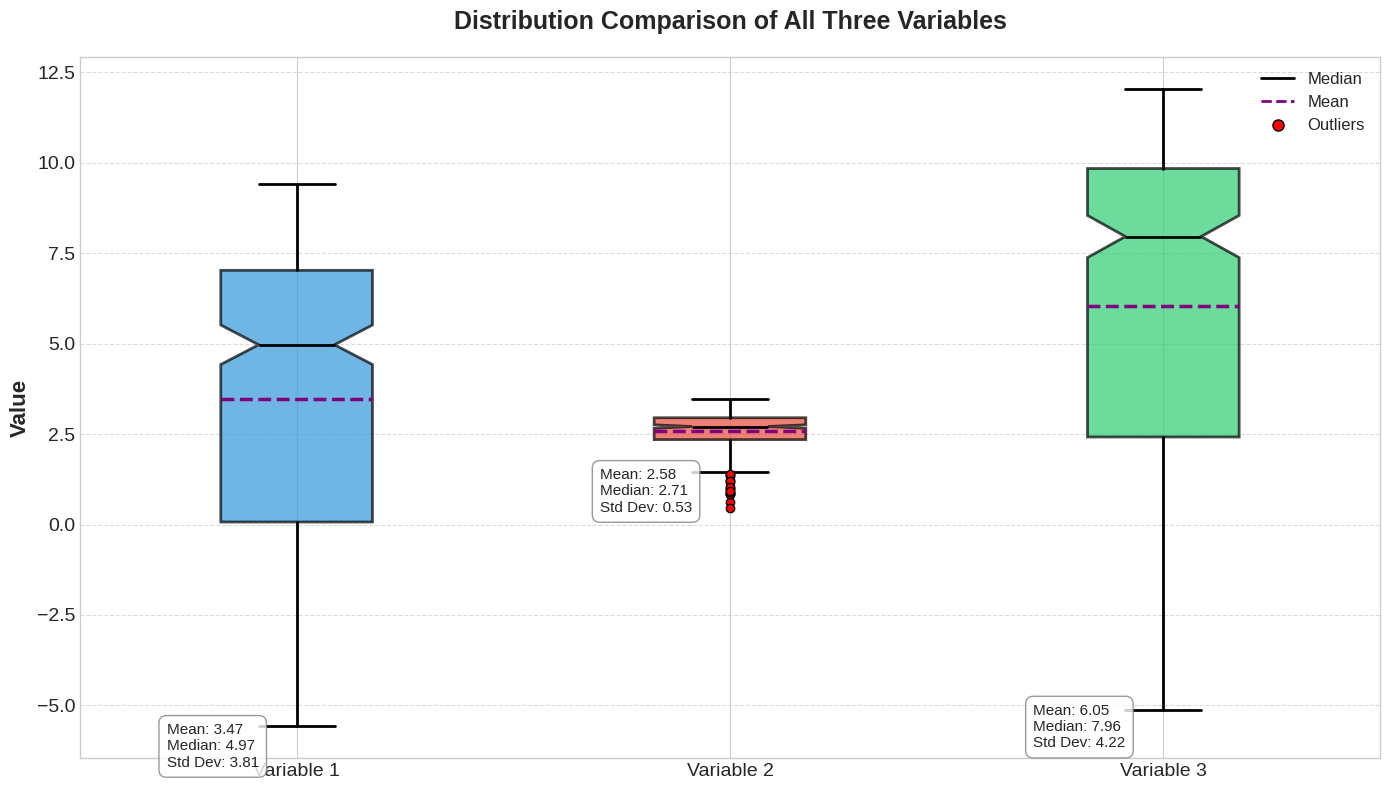

In [17]:
# Box plots for each variable
plt.figure(figsize=(14, 8), dpi=100)

# Create a box plot with enhanced styling
bp = plt.boxplot([df['var1'], df['var2'], df['var3']],
                patch_artist=True,
                notch=True,
                vert=True,
                widths=0.35,
                showmeans=True,
                meanline=True)

# Customize box colors
colors = ['#3498db', '#e74c3c', '#2ecc71']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Customize other elements
for element in ['whiskers', 'caps', 'boxes', 'medians']:
    plt.setp(bp[element], linewidth=2)

plt.setp(bp['medians'], color='black')
plt.setp(bp['means'], linestyle='--', linewidth=2.5, color='purple')
plt.setp(bp['fliers'], marker='o',
         markerfacecolor='red', markersize=6, markeredgecolor='black')

# Add labels and title
plt.xticks([1, 2, 3], ['Variable 1', 'Variable 2', 'Variable 3'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Value', fontsize=16, fontweight='bold')
plt.title('Distribution Comparison of All Three Variables',
          fontsize=18, fontweight='bold', pad=20)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add a legend for means and medians
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='black', lw=2),
    Line2D([0], [0], color='purple', lw=2, linestyle='--'),
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor='red', markersize=8, markeredgecolor='black')
]
plt.legend(custom_lines, ['Median', 'Mean', 'Outliers'],
           loc='upper right', fontsize=12)

# Add statistical annotations
for i, var in enumerate(['var1', 'var2', 'var3']):
    stats_text = (f"Mean: {df[var].mean():.2f}\n"
                 f"Median: {df[var].median():.2f}\n"
                 f"Std Dev: {df[var].std():.2f}")

    plt.annotate(stats_text, xy=(i+1, df[var].min()),
                xytext=(i+0.7, df[var].min() - abs(df[var].min())*0.2),
                bbox=dict(boxstyle="round,pad=0.5",
                          fc="white", ec="gray", alpha=0.8),
                fontsize=11)

plt.tight_layout()
plt.show()

Finally, let's check if there's a class column and visualize it if it exists:

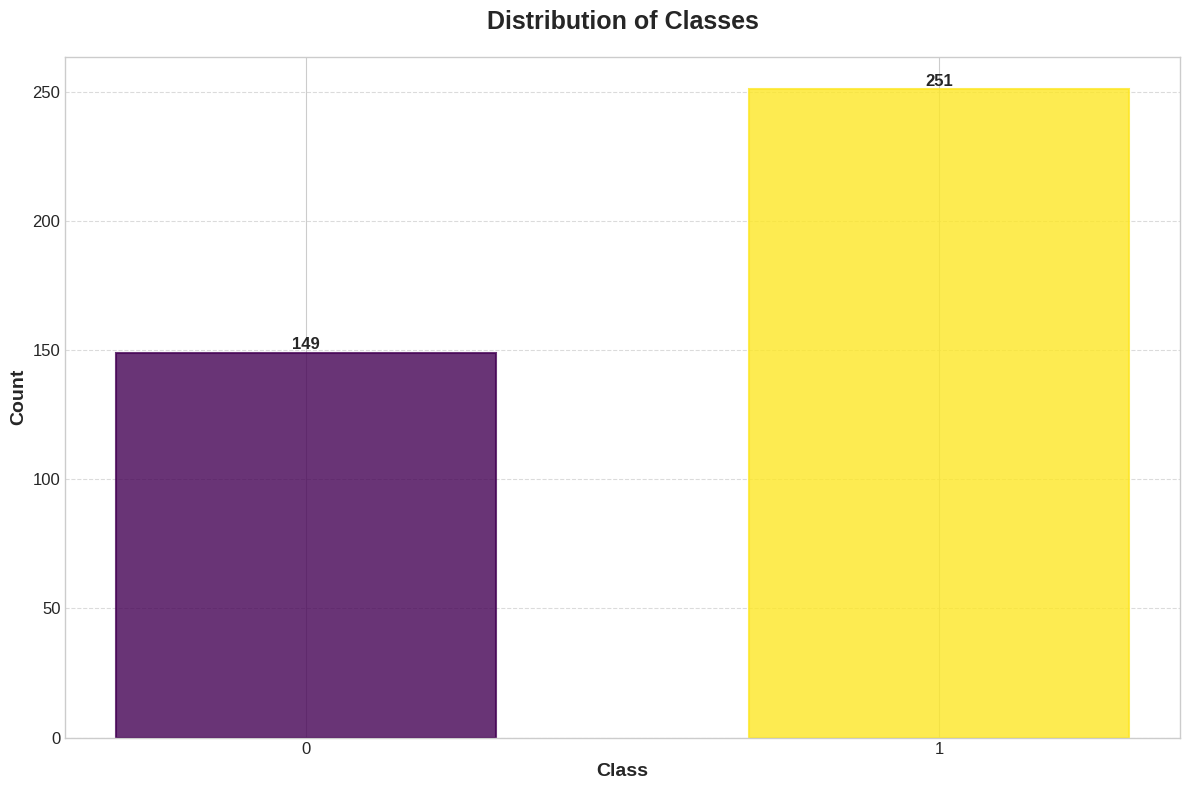

In [18]:
# Check if 'class' column exists and visualize class distribution if available
if 'class' in df.columns:
    # Plot class distribution
    plt.figure(figsize=(12, 8), dpi=100)

    # Count the occurrences of each class
    class_counts = df['class'].value_counts().sort_index()

    # Create a bar chart
    bars = plt.bar(class_counts.index.astype(str), class_counts.values,
                  width=0.6, edgecolor='black', linewidth=1.5)

    # Color the bars using a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(class_counts)))
    for bar, color in zip(bars, colors):
        bar.set_color(color)
        bar.set_alpha(0.8)

    # Add data labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height}', ha='center', va='bottom',
                 fontsize=12, fontweight='bold')

    plt.xlabel('Class', fontsize=14, fontweight='bold')
    plt.ylabel('Count', fontsize=14, fontweight='bold')
    plt.title('Distribution of Classes', fontsize=18, fontweight='bold', pad=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

Let's add one more visualization focusing on joint relationships between variables:

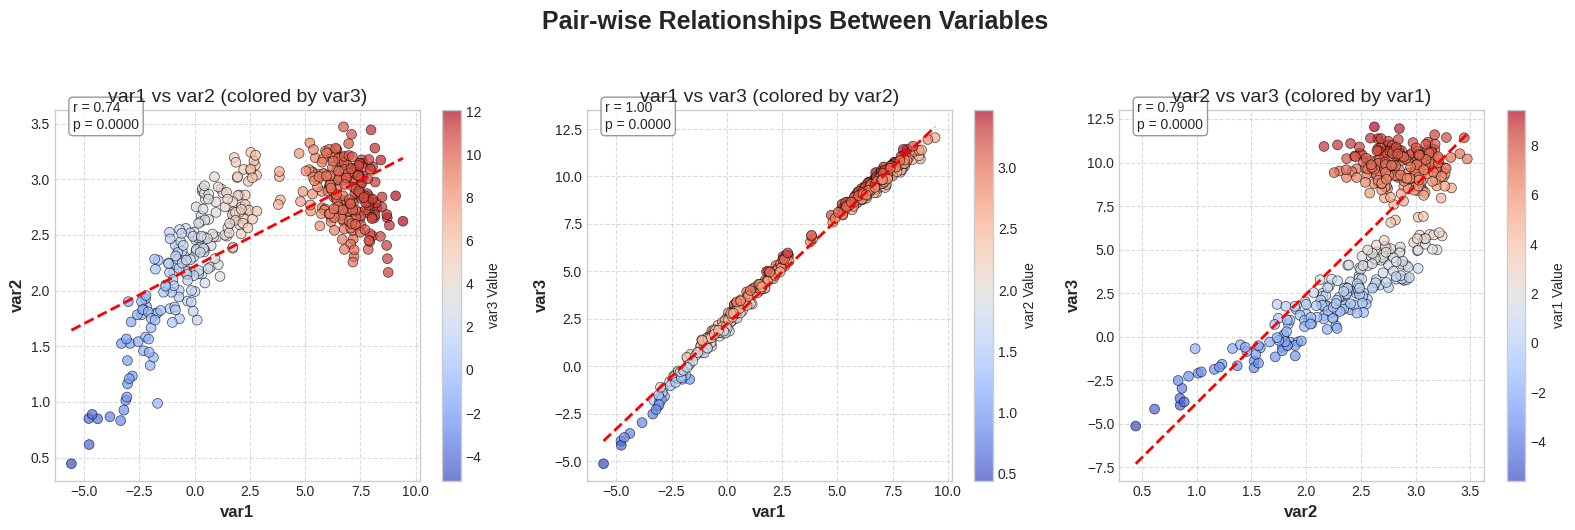

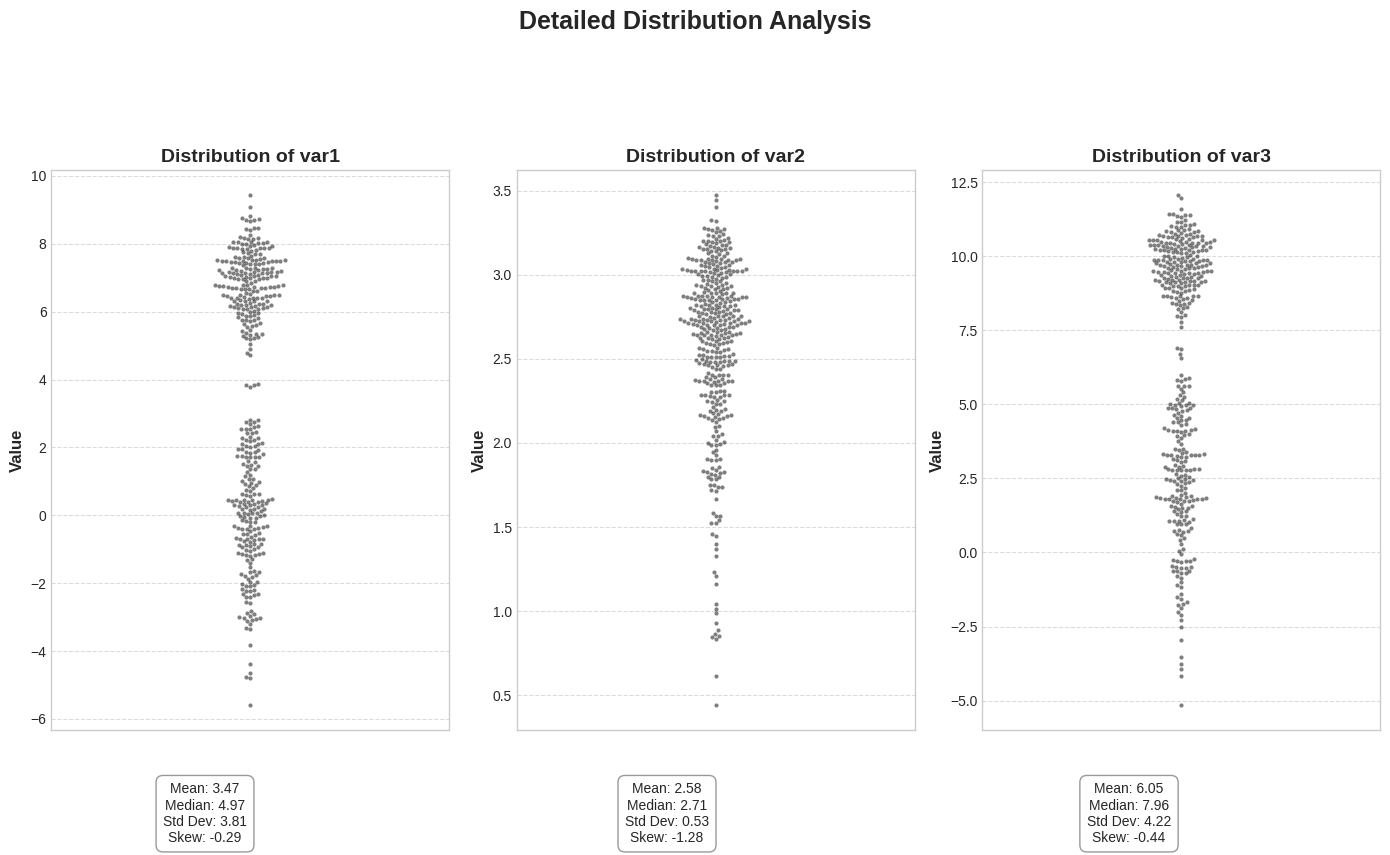

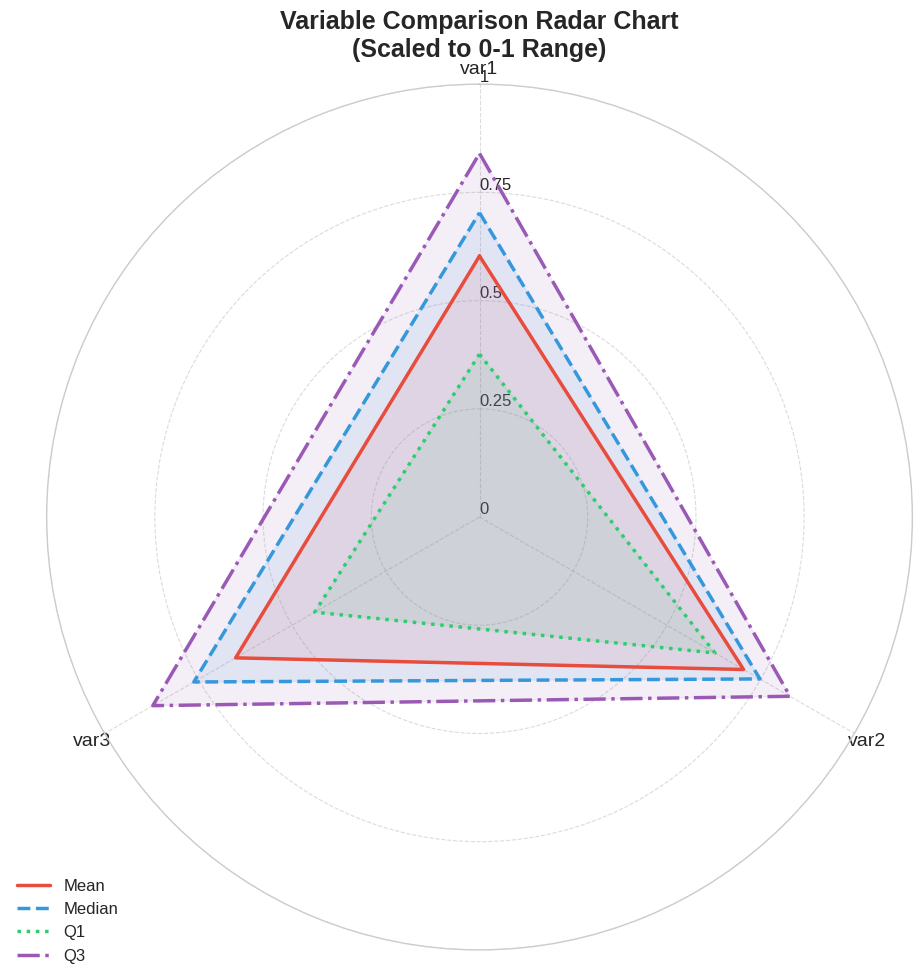

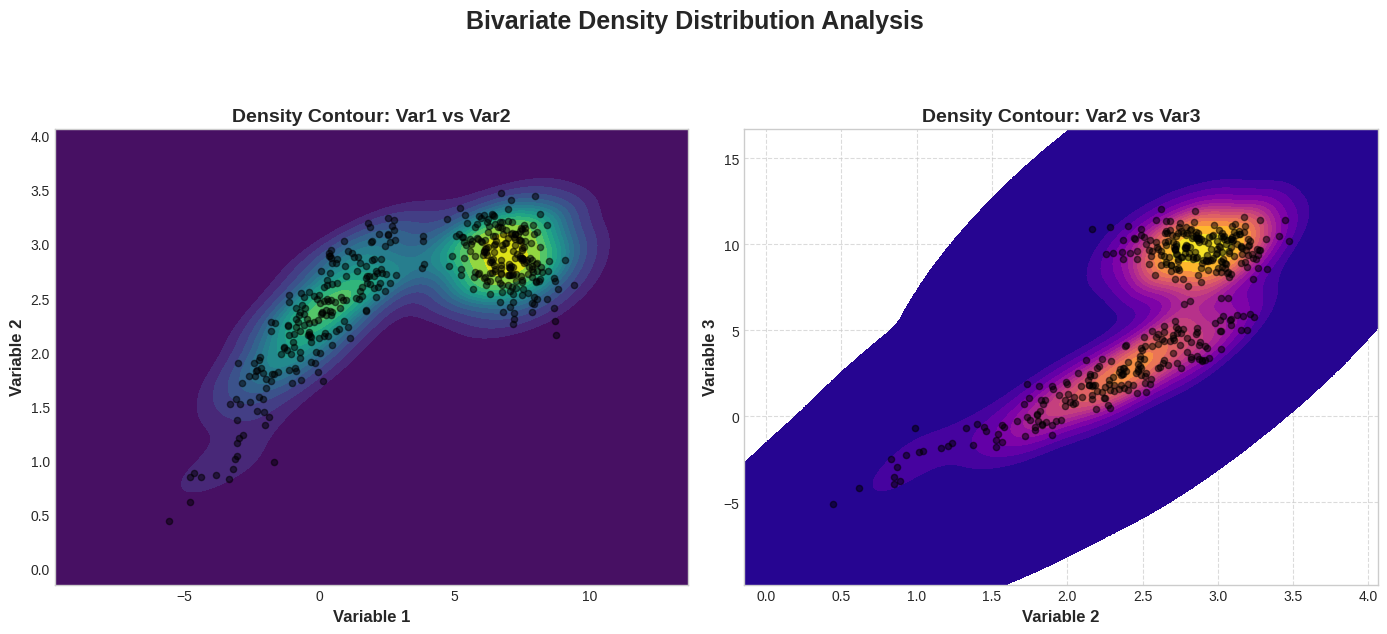

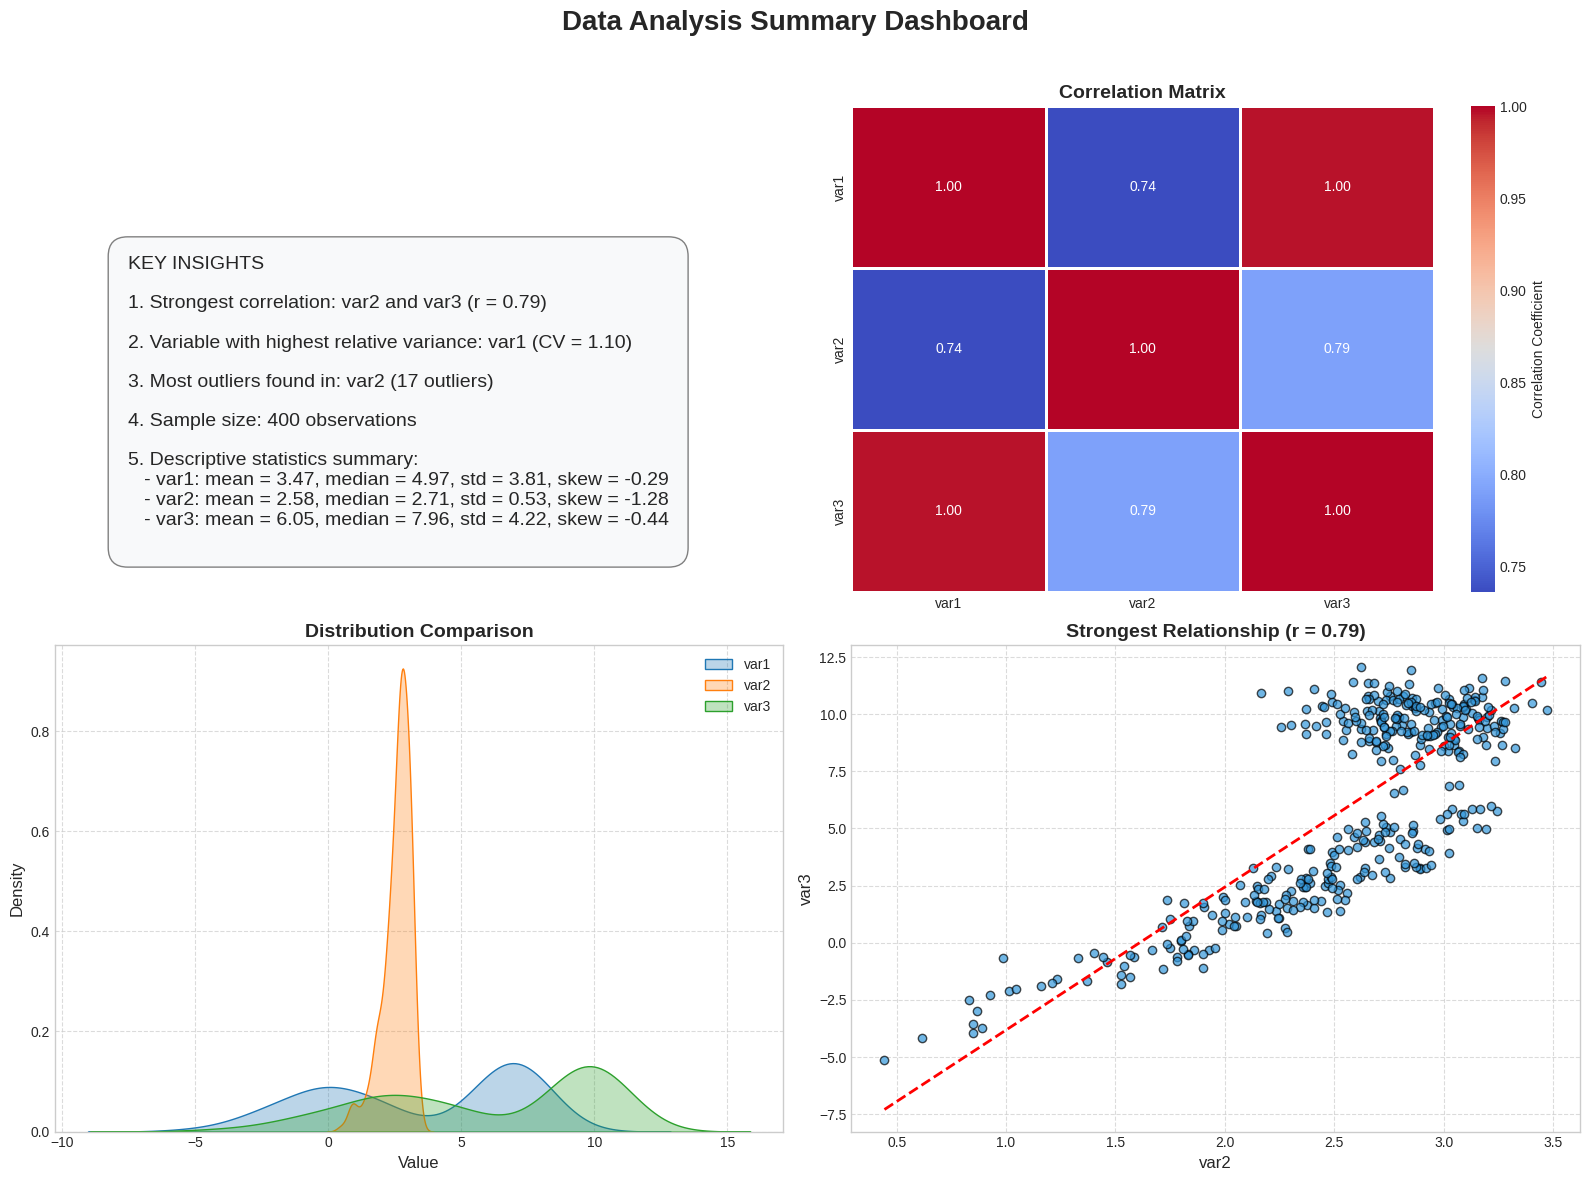

Analysis complete!


In [20]:
# Create a pairplot to visualize relationships between all variables
plt.figure(figsize=(16, 5), dpi=100)

# Create a 1x3 grid for scatter plots
for i, (x, y) in enumerate([(0, 1), (0, 2), (1, 2)]):
    vars = ['var1', 'var2', 'var3']
    plt.subplot(1, 3, i+1)

    # Create scatter plot with color gradient based on third variable
    third_var = vars[3 - (x+y)]
    sc = plt.scatter(df[vars[x]], df[vars[y]],
                    c=df[third_var],
                    cmap='coolwarm',
                    alpha=0.7,
                    s=50,
                    edgecolor='k',
                    linewidth=0.5)

# Add labels and customization
    plt.xlabel(f'{vars[x]}', fontsize=12, fontweight='bold')
    plt.ylabel(f'{vars[y]}', fontsize=12, fontweight='bold')
    plt.title(f'{vars[x]} vs {vars[y]} (colored by {third_var})', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.colorbar(sc, label=f'{third_var} Value')

    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[vars[x]],
                                                                   df[vars[y]])
    x_line = np.linspace(df[vars[x]].min(), df[vars[x]].max(), 100)
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, 'r--', linewidth=2)

    # Add correlation annotation
    plt.annotate(f'r = {r_value:.2f}\np = {p_value:.4f}',
                xy=(0.05, 0.95),
                xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray",
                          alpha=0.8),
                fontsize=10)

plt.tight_layout()
plt.suptitle('Pair-wise Relationships Between Variables',
             fontsize=18,
             fontweight='bold', y=1.05)
plt.subplots_adjust(top=0.85)
plt.show()

# Let's create a violin plot to compare the distributions with more detail
plt.figure(figsize=(14, 8), dpi=100)

# Define colors for all three variables
# Blue, Red, Green for the three variables
colors = ['#3498db', '#e74c3c', '#2ecc71']

# Create subplots for each variable
for i, var in enumerate(['var1', 'var2', 'var3']):
    plt.subplot(1, 3, i+1)

    # Create violin plot
    vp = plt.violinplot(df[var], showmeans=True,
                        showmedians=True, showextrema=True)

    # Customize violin plot
    vp['bodies'][0].set_facecolor(colors[i])
    vp['bodies'][0].set_alpha(0.7)
    vp['bodies'][0].set_edgecolor('black')
    vp['cmins'].set_linewidth(2)
    vp['cmaxes'].set_linewidth(2)
    vp['cbars'].set_linewidth(2)
    vp['cmedians'].set_linewidth(2.5)
    vp['cmedians'].set_color('black')
    vp['cmeans'].set_linewidth(2.5)
    vp['cmeans'].set_color('purple')

    # Add swarm plot overlay for data points
    sns.swarmplot(y=df[var], color='black', alpha=0.5, size=3)

    plt.title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontweight='bold')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Add statistical annotations
    stats_text = (f"Mean: {df[var].mean():.2f}\n"
                 f"Median: {df[var].median():.2f}\n"
                 f"Std Dev: {df[var].std():.2f}\n"
                 f"Skew: {stats.skew(df[var]):.2f}")

    plt.figtext(0.15 + i*0.33, 0.01, stats_text, ha='center',
               bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray",
                         alpha=0.8),
               fontsize=10)
plt.tight_layout()
plt.suptitle('Detailed Distribution Analysis', fontsize=18, fontweight='bold',
             y=1.05)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.show()

# Create a radar chart to compare the scaled variables
def make_radar_chart(df, vars):
    # Scale the variables to 0-1 range for comparison
    scaled_df = pd.DataFrame()
    for var in vars:
        min_val = df[var].min()
        max_val = df[var].max()
        scaled_df[var] = (df[var] - min_val) / (max_val - min_val)

    # Calculate statistics for each variable
    stats_df = pd.DataFrame({
        'Mean': [scaled_df[var].mean() for var in vars],
        'Median': [scaled_df[var].median() for var in vars],
        'Q1': [scaled_df[var].quantile(0.25) for var in vars],
        'Q3': [scaled_df[var].quantile(0.75) for var in vars]
    }, index=vars)

    # Set up the radar chart
    angles = np.linspace(0, 2*np.pi, len(vars), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Add variables as axis labels
    plt.xticks(angles[:-1], vars, fontsize=14)

    # Plot statistics
    for stat, color, style in zip(
        ['Mean', 'Median', 'Q1', 'Q3'],
        ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6'],
        ['-', '--', ':', '-.']
    ):
        values = stats_df[stat].values.tolist()
        values += values[:1]  # Close the loop

        ax.plot(angles, values, linewidth=2.5, linestyle=style, color=color,
                label=stat)
        ax.fill(angles, values, color=color, alpha=0.1)

    # Customize the chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0', '0.25', '0.5', '0.75', '1'],
               fontsize=12)
    plt.ylim(0, 1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)

    plt.title('Variable Comparison Radar Chart\n(Scaled to 0-1 Range)',
              fontsize=18, fontweight='bold', pad=20)
    plt.grid(True, linestyle='--', alpha=0.7)

    return fig, ax

# Create and display the radar chart
vars = ['var1', 'var2', 'var3']
radar_fig, radar_ax = make_radar_chart(df, vars)
plt.tight_layout()
plt.show()

# Add a contour plot to visualize the density distribution
plt.figure(figsize=(14, 6), dpi=100)

# First subplot: Density contour for var1 vs var2
plt.subplot(1, 2, 1)
sns.kdeplot(x=df['var1'], y=df['var2'], cmap="viridis", fill=True,
            thresh=0, levels=15)
plt.scatter(df['var1'], df['var2'], c='black', s=20, alpha=0.5)
plt.xlabel('Variable 1', fontsize=12, fontweight='bold')
plt.ylabel('Variable 2', fontsize=12, fontweight='bold')
plt.title('Density Contour: Var1 vs Var2', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Second subplot: Density contour for var2 vs var3
plt.subplot(1, 2, 2)
sns.kdeplot(x=df['var2'], y=df['var3'], cmap="plasma", fill=True,
            thresh=0, levels=15)
plt.scatter(df['var2'], df['var3'], c='black', s=20, alpha=0.5)
plt.xlabel('Variable 2', fontsize=12, fontweight='bold')
plt.ylabel('Variable 3', fontsize=12, fontweight='bold')
plt.title('Density Contour: Var2 vs Var3', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Bivariate Density Distribution Analysis', fontsize=18,
             fontweight='bold', y=1.05)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Finally, let's create a summary dashboard with key insights
plt.figure(figsize=(16, 12), dpi=100)

# Add a text box with key findings
plt.subplot(2, 2, 1)
plt.axis('off')

# Calculate key insights
var_correlations = df[['var1', 'var2', 'var3']].corr()
# Unstack the correlation matrix to a Series
unstacked_corr = var_correlations.unstack()
# Sort and filter out self-correlations (which are always 1.0)
sorted_corr = unstacked_corr[unstacked_corr < 0.99].sort_values(ascending=False)
# Get the strongest correlation (which will be the first element)
strongest_corr = sorted_corr.iloc[0]
strongest_pair = sorted_corr.index[0]  # This gives you the pair as a tuple
strongest_val = strongest_corr

# Find the variable with highest variance (normalized by mean)
var_cv = df[['var1', 'var2', 'var3']].std() / df[['var1', 'var2', 'var3']].mean()
highest_var = var_cv.idxmax()
highest_var_val = var_cv.max()
# Check for outliers using IQR method
outliers = {}
for var in ['var1', 'var2', 'var3']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[var] < (Q1 - 1.5 * IQR)) | (df[var] >
     (Q3 + 1.5 * IQR))).sum()
    outliers[var] = outlier_count

most_outliers = max(outliers, key=outliers.get)

# Create insights text
insights_text = (
    "KEY INSIGHTS\n\n"
    f"1. Strongest correlation: {strongest_pair[0]} and {strongest_pair[1]} (r = {strongest_val:.2f})\n\n"
    f"2. Variable with highest relative variance: {highest_var} (CV = {highest_var_val:.2f})\n\n"
    f"3. Most outliers found in: {most_outliers} ({outliers[most_outliers]} outliers)\n\n"
    f"4. Sample size: {len(df)} observations\n\n"
    "5. Descriptive statistics summary:\n"
)

for var in ['var1', 'var2', 'var3']:
    insights_text += (
        f"   - {var}: mean = {df[var].mean():.2f}, median = {df[var].median():.2f}, "
        f"std = {df[var].std():.2f}, skew = {stats.skew(df[var]):.2f}\n"
    )

# Display the insights
plt.text(0.1, 0.1, insights_text, fontsize=14,
         bbox=dict(boxstyle="round,pad=1", fc="#f8f9fa", ec="gray", alpha=1.0))

# Add a mini correlation heatmap
plt.subplot(2, 2, 2)
sns.heatmap(var_correlations, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=1,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')

# Add a small distribution comparison
plt.subplot(2, 2, 3)
for i, var in enumerate(['var1', 'var2', 'var3']):
    sns.kdeplot(df[var], label=var, fill=True, alpha=0.3)

plt.title('Distribution Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add a scatter plot of the strongest correlation
plt.subplot(2, 2, 4)
x_var, y_var = strongest_pair

plt.scatter(df[x_var], df[y_var], alpha=0.7, c='#3498db', edgecolor='k')
plt.xlabel(x_var, fontsize=12)
plt.ylabel(y_var, fontsize=12)
plt.title(f'Strongest Relationship (r = {strongest_val:.2f})', fontsize=14,
          fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Add regression line
slope, intercept, r_value, p_value,
std_err = stats.linregress(df[x_var], df[y_var])
x_line = np.linspace(df[x_var].min(), df[x_var].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r--', linewidth=2)

# Add overall title
plt.suptitle('Data Analysis Summary Dashboard', fontsize=20,
             fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Save the comprehensive analysis to a PDF file
from matplotlib.backends.backend_pdf import PdfPages

def save_all_figures(filename='data_analysis_report.pdf'):
    with PdfPages(filename) as pdf:
        # Get all figures
        figs = [plt.figure(n) for n in plt.get_fignums()]

        # Save each figure to PDF
        for fig in figs:
            pdf.savefig(fig)

        # Set PDF metadata
        d = pdf.infodict()
        d['Title'] = 'Data Analysis Report'
        d['Author'] = 'Python Data Science'
        d['Subject'] = 'Comprehensive Analysis of Random and Parquet Data'
        d['Keywords'] = 'data science, visualization, analysis'

    print(f"Analysis saved to {filename}")

# Uncomment to save all figures
# save_all_figures()

# End of analysis for Problem 2
print("Analysis complete!")